# Mini Project 1.

Thinakone Louangdy

## Upload Data Here

In [9]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [10]:
import io
import pandas as pd

data = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']), sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

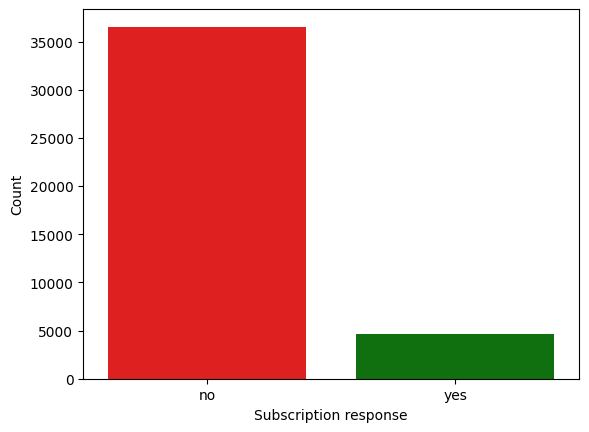

In [11]:
# Plot our target class
import matplotlib.pyplot as plt
import seaborn as sns

y_counts = data["y"].value_counts()

sns.barplot(x=y_counts.index, y=y_counts.values, hue=y_counts.index, palette=["red", "green"], legend=False)
plt.xlabel("Subscription response")
plt.ylabel("Count")
plt.show()

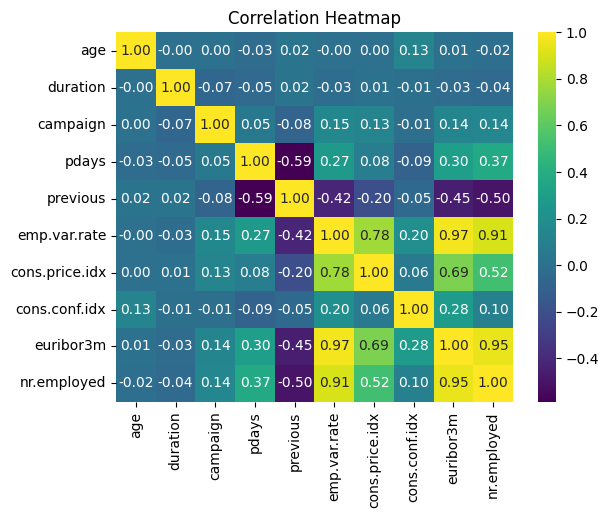

In [26]:
numerical_features = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

sns.heatmap(data[numerical_features].corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

## Preprocessing Data

In [27]:
# We start off by encoding our categorical data with OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

# excluded = ['duration', 'cons.price.idx', 'emp.var.rate', 'euribor3m', 'nr.employed'] # Explanation in the report
remaining_columns = ["age", "campaign", "pdays", "cons.conf.idx", "euribor3m", "previous", "y"]
categorical_columns = ["job", "marital", "education", "contact", "default",
                       "housing", "loan", "poutcome", "month", "day_of_week"]

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoded_data = encoder.fit_transform(data[categorical_columns]).toarray()
encoded_features = encoder.get_feature_names_out()

df = pd.concat([data[remaining_columns], pd.DataFrame(encoded_data, columns=encoded_features)], axis=1, ignore_index=False)

# We will also encoded our result target
mapping = {'yes': 1, 'no': 0}
df['y'] = df['y'].map(mapping)

In [28]:
df.describe

<bound method NDFrame.describe of        age  campaign  pdays  cons.conf.idx  euribor3m  previous  y  \
0       56         1    999          -36.4      4.857         0  0   
1       57         1    999          -36.4      4.857         0  0   
2       37         1    999          -36.4      4.857         0  0   
3       40         1    999          -36.4      4.857         0  0   
4       56         1    999          -36.4      4.857         0  0   
...    ...       ...    ...            ...        ...       ... ..   
41183   73         1    999          -50.8      1.028         0  1   
41184   46         1    999          -50.8      1.028         0  0   
41185   56         2    999          -50.8      1.028         0  0   
41186   44         1    999          -50.8      1.028         0  1   
41187   74         3    999          -50.8      1.028         1  0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0                  0.0               0.0          

## Training Model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression


X = df.drop(columns=["y"]) # We excluded 'y' out from our data for training in our model
Y = df["y"] # our target label

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 49)
(8238, 49)
(32950,)
(8238,)


In [32]:
from sklearn.preprocessing import StandardScaler

# Stardardized features
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)

(32950, 49)
(8238, 49)


## Try Random Forest & Logistic Regression

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

In [34]:
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)

print("confusion: \n", lr_conf)
print(classification_report(y_test, lr_pred))

confusion: 
 [[7187  116]
 [ 744  191]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.62      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.76      0.59      0.63      8238
weighted avg       0.87      0.90      0.87      8238



In [35]:
rf_model.fit(x_train_scaled, y_train)
rf_pred = rf_model.predict(x_test_scaled)

rf_conf = confusion_matrix(y_test, rf_pred)

print("confusion: \n", rf_conf)
print(classification_report(y_test, rf_pred))

confusion: 
 [[7077  226]
 [ 667  268]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.54      0.29      0.38       935

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [36]:
def visualize_performance(model_confusion_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(model_confusion_matrix, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xticks(range(2), ['no_predicted', 'yes_predicted'], fontsize=14)
    plt.yticks(range(2), ['true_no', 'true_yes'], fontsize=14)
    plt.xlabel('Predicted values', fontsize=16)
    plt.ylabel('Real Values', fontsize=16)
    plt.title('Confusion Matrix', fontsize=16)

    # Iterate through confusion matrix cells and add annotations
    for i in range(model_confusion_matrix.shape[0]):
        for j in range(model_confusion_matrix.shape[1]):
            plt.text(j, i, model_confusion_matrix[i, j], ha='center', va='center', fontsize=12)

    plt.show()

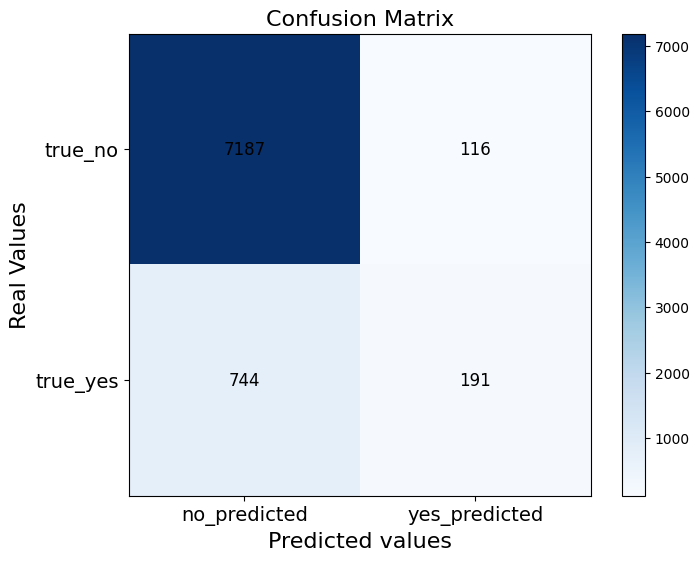

In [37]:
visualize_performance(lr_conf)

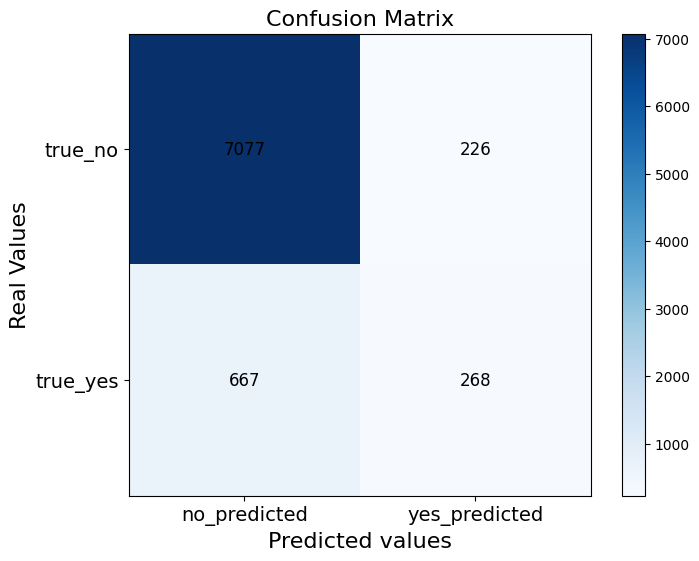

In [38]:
visualize_performance(rf_conf)

In [50]:
from sklearn.metrics import roc_curve, auc

def roc_performance(lr_model, rf_model):

    y_prob_lr = lr_model.predict_proba(x_test)[:, 1]
    y_prob_rf = rf_model.predict_proba(x_test)[:, 1]

    # Random Forest calculations
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    # Logistic Regression calculations
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure(figsize=(8, 6))

    # Logistic Regression Plot
    plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)

    # Random Forest Plot
    plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)

    plt.plot([0, 1], [0, 1], color='navy', linestyle='dashdot')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest')
    plt.legend(loc="lower right")
    plt.show()

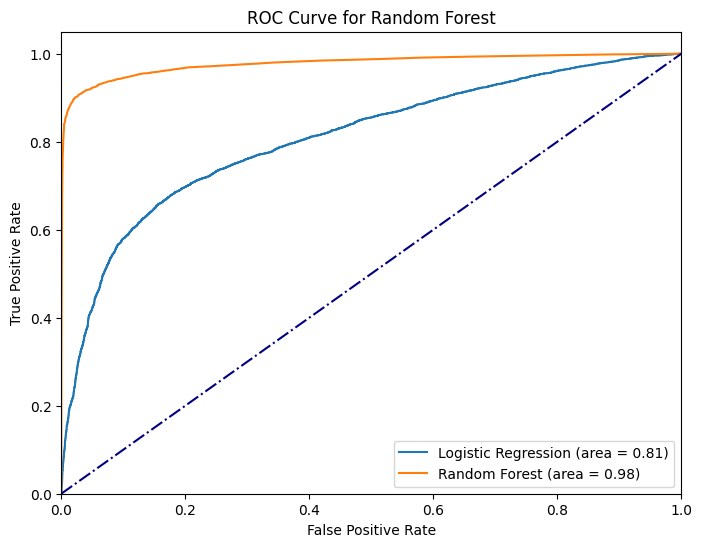

In [56]:
roc_performance(lr_model, rf_model)

## Apply Oversampling Method

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(X, Y)

x_resampled_scaled = scaler.fit_transform(x_resampled)

x_train, x_test, y_train, y_test = train_test_split(x_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

In [54]:
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

lr_conf = confusion_matrix(y_test, lr_pred)

print(classification_report(y_test, lr_pred))
print("Conf: \n", lr_conf)

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      7332
           1       0.80      0.67      0.73      7288

    accuracy                           0.75     14620
   macro avg       0.76      0.75      0.75     14620
weighted avg       0.76      0.75      0.75     14620

Conf: 
 [[6087 1245]
 [2399 4889]]


In [55]:
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

rf_conf = confusion_matrix(y_test, rf_pred)

print(classification_report(y_test, rf_pred))
print("Conf: \n", rf_conf)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7332
           1       0.95      0.92      0.94      7288

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620

Conf: 
 [[7008  324]
 [ 594 6694]]


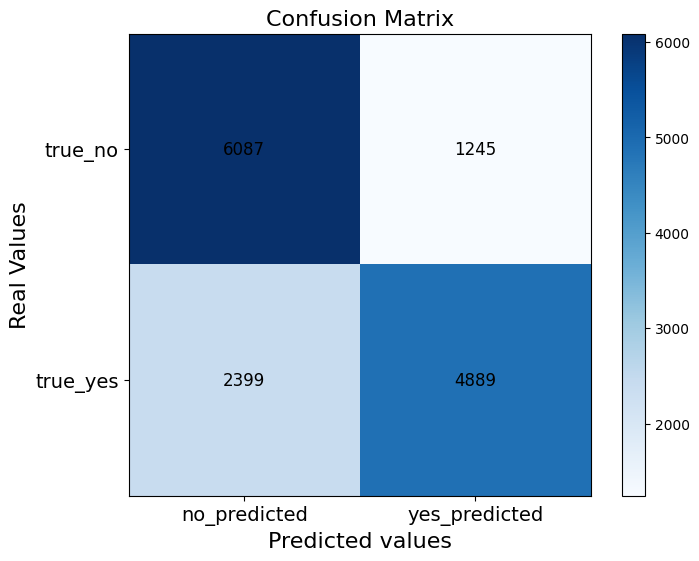

In [57]:
visualize_performance(lr_conf)

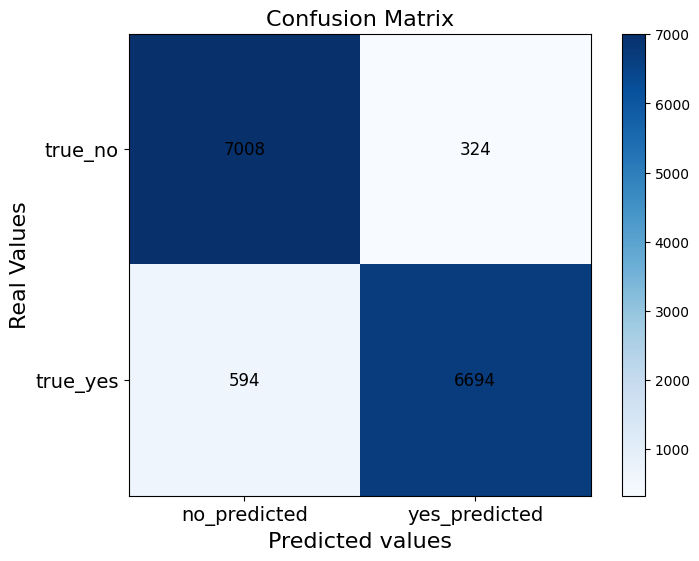

In [58]:
visualize_performance(rf_conf)

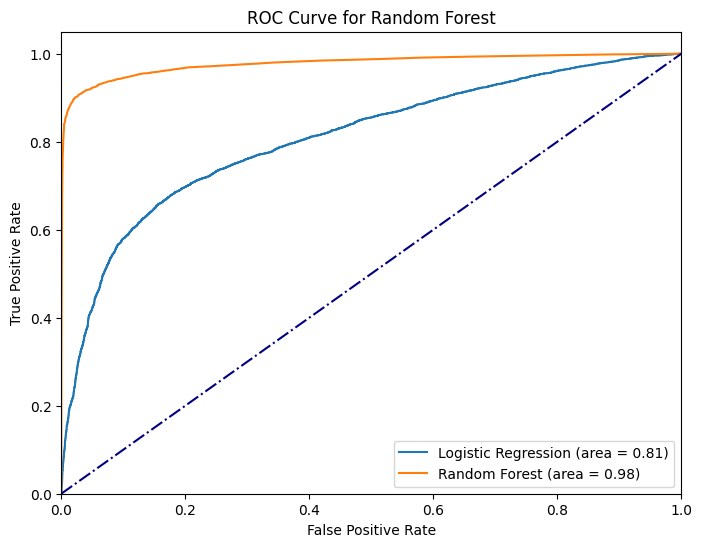

In [59]:
roc_performance(lr_model, rf_model)